# Model training

In [55]:
import torch
from torch import nn
import pandas as pd

In [56]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [57]:
# Load data

X_train = pd.read_csv("./../data/features/in_features_train.csv")
X_train_pca = pd.read_csv("./../data/features/pca_in_features_train.csv")

X_train.shape, X_train_pca.shape

((145, 2593), (145, 61))

In [58]:
y_train = pd.read_csv("./../data/features/out_features_train.csv").label
y_train_pca = pd.read_csv("./../data/features/pca_out_features_train.csv").label

y_train.shape, y_train_pca.shape

((145,), (145,))

In [59]:
X_test = pd.read_csv("./../data/features/in_features_test.csv")
X_test_pca = pd.read_csv("./../data/features/pca_in_features_test.csv")

X_test.shape, X_test_pca.shape

((16, 2593), (16, 61))

In [60]:
y_test = pd.read_csv("./../data/features/out_features_test.csv").label

y_test.shape

(16,)

## Support Vector Machine (SVM)

### Non PCA features

In [61]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold

svm = SVC(kernel='rbf', C=10, gamma=0.01)
# p_grid = {"C": [1, 10, 20, 50, 100], "gamma": [0.01, 0.1, 0.2, 0.4, 0.6, 0.8]}
# cv = KFold(n_splits=5, shuffle=True)

# clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=cv, scoring="f1_macro")
# clf.fit(X_train, y_train)

clf = svm.fit(X_train, y_train)

In [62]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 0], dtype=int64)

In [63]:
y_test.to_numpy()

array([2, 2, 0, 0, 0, 2, 0, 1, 3, 1, 2, 0, 1, 0, 0, 0], dtype=int64)

In [64]:
from modules.engine import get_metrics
svm_train_metrics = get_metrics(y_train, clf.predict(X_train))

Accuracy:  0.8689655172413793  | F1-score:  0.8692980296196385  | Precision:  0.8928321678321678  | Recall:  0.8689655172413794


In [65]:
# Evaluate
svm_test_metrics = get_metrics(y_test, y_pred)

Accuracy:  0.5  | F1-score:  0.28421052631578947  | Precision:  0.28409090909090906  | Recall:  0.3020833333333333


In [66]:
clf.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.01,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [67]:
import joblib
from pathlib import Path


# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "svm.pk"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

joblib.dump(clf, MODEL_SAVE_PATH)

['models\\svm.pk']

### PCA features


In [68]:
svm = SVC(kernel='rbf', C=20, gamma=0.01)
# p_grid = {"C": [1, 10, 100], "gamma": [0.01, 0.1]}
# cv = KFold(n_splits=5, shuffle=True)

# clf_pca = GridSearchCV(estimator=svm, param_grid=p_grid, cv=cv, scoring="f1_macro")
# clf_pca.fit(X_train_pca, y_train)

clf_pca = svm.fit(X_train_pca, y_train_pca)

In [69]:
y_pred = clf_pca.predict(X_test_pca)

In [70]:
y_test.to_numpy()

array([2, 2, 0, 0, 0, 2, 0, 1, 3, 1, 2, 0, 1, 0, 0, 0], dtype=int64)

In [71]:
svm_pca_train_metrics = get_metrics(y_train, clf_pca.predict(X_train_pca))

Accuracy:  0.9793103448275862  | F1-score:  0.9791873019779139  | Precision:  0.9792939244663383  | Recall:  0.9793103448275862


In [72]:
# Evaluate
svm_pca_test_metrics = get_metrics(y_test, y_pred)

Accuracy:  0.5  | F1-score:  0.27777777777777773  | Precision:  0.2583333333333333  | Recall:  0.3020833333333333


## Linear model

## Non-PCA

In [73]:
X_train = torch.from_numpy(X_train.to_numpy()).type(torch.float)
X_test = torch.from_numpy(X_test.to_numpy()).type(torch.float)

classes = y_train.unique()

y_train = torch.from_numpy(y_train.to_numpy()).type(torch.LongTensor)
y_test = torch.from_numpy(y_test.to_numpy()).type(torch.LongTensor)

in_features, out_features = X_train.shape[1], len(classes)
in_features, out_features

(2593, 5)

In [74]:
from modules.model_builder import BaseModel

model_0 = BaseModel(in_features, 50, out_features).to(device)

In [75]:
from modules.engine import train, save_model

loss_fn = nn.CrossEntropyLoss()
optimizer_class = torch.optim.SGD

train(model_0, X_train, X_test, y_train, y_test,
      loss_fn, optimizer_class, epochs=500, lr=0.1, device=device, verbose=True)

Epoch: 0
Accuracy:  0.5  | F1-score:  0.16666666666666666  | Precision:  0.25  | Recall:  0.125
Train Loss: 1.6131213903427124 | Test loss: 1.5592514276504517
---------------------------------------------------------
Epoch: 100
Accuracy:  0.3125  | F1-score:  0.18823529411764706  | Precision:  0.3125  | Recall:  0.30357142857142855
Train Loss: 1.575860857963562 | Test loss: 1.5969140529632568
---------------------------------------------------------
Epoch: 200
Accuracy:  0.1875  | F1-score:  0.07894736842105263  | Precision:  0.25  | Recall:  0.046875
Train Loss: 1.2160621881484985 | Test loss: 1.488419532775879
---------------------------------------------------------
Epoch: 300
Accuracy:  0.375  | F1-score:  0.225  | Precision:  0.34375  | Recall:  0.25
Train Loss: 1.0679926872253418 | Test loss: 1.3843406438827515
---------------------------------------------------------
Epoch: 400
Accuracy:  0.5625  | F1-score:  0.3492063492063492  | Precision:  0.3645833333333333  | Recall:  0.341

In [76]:
model_0.eval()
with torch.inference_mode():
    y_train_logits = model_0(X_train.to(device))
    y_train_pred = y_train_logits.argmax(dim=1).to("cpu")
    y_test_logits = model_0(X_test.to(device))
    y_test_pred = y_test_logits.argmax(dim=1).to("cpu")

In [77]:

mlp_train_metrics = get_metrics(y_train, y_train_pred)

Accuracy:  0.9793103448275862  | F1-score:  0.9790344119157679  | Precision:  0.9804301075268818  | Recall:  0.9793103448275862


In [78]:

mlp_test_metrics = get_metrics(y_test, y_test_pred)

Accuracy:  0.625  | F1-score:  0.4194444444444444  | Precision:  0.425  | Recall:  0.4270833333333333


In [79]:
save_model(model_0, "mlp.pth")

Saving model to: models\mlp.pth


## PCA Model

In [80]:
X_train_pca = torch.from_numpy(X_train_pca.to_numpy()).type(torch.float)
X_test_pca = torch.from_numpy(X_test_pca.to_numpy()).type(torch.float)

y_train_pca = torch.from_numpy(y_train_pca.to_numpy()).type(torch.LongTensor)



In [81]:
in_features_pca = X_train_pca.shape[1]
in_features_pca, out_features

(61, 5)

In [82]:
model_0_pca = BaseModel(in_features_pca, 50, out_features).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer_class = torch.optim.SGD

train(model_0_pca, X_train_pca, X_test_pca, y_train, y_test,
      loss_fn, optimizer_class, 500, 0.1, device, verbose=True)

Epoch: 0
Accuracy:  0.0625  | F1-score:  0.029411764705882353  | Precision:  0.25  | Recall:  0.015625
Train Loss: 1.6127872467041016 | Test loss: 1.612648367881775
---------------------------------------------------------
Epoch: 100
Accuracy:  0.5  | F1-score:  0.3291666666666666  | Precision:  0.3333333333333333  | Recall:  0.3375
Train Loss: 1.573319911956787 | Test loss: 1.5976684093475342
---------------------------------------------------------
Epoch: 200
Accuracy:  0.3125  | F1-score:  0.2409090909090909  | Precision:  0.29166666666666663  | Recall:  0.27976190476190477
Train Loss: 1.2192190885543823 | Test loss: 1.462967872619629
---------------------------------------------------------
Epoch: 300
Accuracy:  0.3125  | F1-score:  0.23636363636363633  | Precision:  0.23958333333333331  | Recall:  0.3273809523809524
Train Loss: 0.9993768334388733 | Test loss: 1.370811939239502
---------------------------------------------------------
Epoch: 400
Accuracy:  0.4375  | F1-score:  0.30

In [83]:
model_0_pca.eval()
with torch.inference_mode():
    y_train_logits = model_0_pca(X_train_pca.to(device))
    y_train_pred = y_train_logits.argmax(dim=1).to("cpu")
    y_test_logits = model_0_pca(X_test_pca.to(device))
    y_test_pred = y_test_logits.argmax(dim=1).to("cpu")

In [84]:
mlp_pca_train_metrics = get_metrics(y_train, y_train_pred)

Accuracy:  0.9586206896551724  | F1-score:  0.9582324455205811  | Precision:  0.9585185185185185  | Recall:  0.9586206896551724


In [85]:
mlp_pca_test_metrics = get_metrics(y_test, y_test_pred)

Accuracy:  0.4375  | F1-score:  0.30624999999999997  | Precision:  0.3229166666666667  | Recall:  0.3020833333333333


In [86]:
save_model(model_0_pca, "mlp_pca.pth")

Saving model to: models\mlp_pca.pth


## Convolution Model

### Non-PCA

In [87]:
X_train = X_train.unsqueeze(1)
X_test = X_test.unsqueeze(1)

In [88]:
in_channels, in_length = X_train.shape[1:]
in_channels, in_length

(1, 2593)

In [89]:
from modules.model_builder import ConvModel

model_1 = ConvModel(in_channels, in_length, 50, out_features).to(device)

In [90]:
train(model_1, X_train, X_test, y_train, y_test,
      loss_fn, optimizer_class, 500, 0.1, device, verbose=True)

Epoch: 0
Accuracy:  0.0625  | F1-score:  0.03125  | Precision:  0.25  | Recall:  0.016666666666666666
Train Loss: 1.6094534397125244 | Test loss: 1.609411358833313
---------------------------------------------------------
Epoch: 100
Accuracy:  0.4375  | F1-score:  0.34469696969696967  | Precision:  0.3645833333333333  | Recall:  0.4270833333333333
Train Loss: 1.6076202392578125 | Test loss: 1.6089274883270264
---------------------------------------------------------
Epoch: 200
Accuracy:  0.375  | F1-score:  0.21764705882352942  | Precision:  0.3125  | Recall:  0.3269230769230769
Train Loss: 1.5918798446655273 | Test loss: 1.5965713262557983
---------------------------------------------------------
Epoch: 300
Accuracy:  0.1875  | F1-score:  0.0923076923076923  | Precision:  0.075  | Recall:  0.12
Train Loss: 1.6082953214645386 | Test loss: 1.6093240976333618
---------------------------------------------------------
Epoch: 400
Accuracy:  0.0  | F1-score:  0.0  | Precision:  0.0  | Recall

In [91]:
model_1.eval()
with torch.inference_mode():
    y_train_logits = model_1(X_train.to(device))
    y_train_pred = y_train_logits.argmax(dim=1).to("cpu")
    y_test_logits = model_1(X_test.to(device))
    y_test_pred = y_test_logits.argmax(dim=1).to("cpu")

In [92]:
cnn_train_metrics = get_metrics(y_train, y_train_pred)

Accuracy:  0.4  | F1-score:  0.27999999999999997  | Precision:  0.25  | Recall:  0.4


In [93]:
cnn_test_metrics = get_metrics(y_test, y_test_pred)

Accuracy:  0.25  | F1-score:  0.1  | Precision:  0.0625  | Recall:  0.25


In [94]:
save_model(model_1, "cnn.pth")

Saving model to: models\cnn.pth


### PCA

In [95]:
X_train_pca = X_train_pca.unsqueeze(1)
X_test_pca = X_test_pca.unsqueeze(1)

In [96]:
in_channels, in_length = X_train_pca.shape[1:]
in_channels, in_length

(1, 61)

In [97]:
model_1_pca = ConvModel(in_channels, in_length, 70, out_features).to(device)

In [98]:
train(model_1_pca, X_train_pca, X_test_pca, y_train_pca, y_test,
      loss_fn, optimizer_class, 500, 0.1, device, verbose=True)

Epoch: 0
Accuracy:  0.5  | F1-score:  0.16666666666666666  | Precision:  0.25  | Recall:  0.125
Train Loss: 1.610012173652649 | Test loss: 1.596627116203308
---------------------------------------------------------


Epoch: 100
Accuracy:  0.25  | F1-score:  0.08421052631578949  | Precision:  0.1  | Recall:  0.07272727272727272
Train Loss: 1.6032638549804688 | Test loss: 1.6082948446273804
---------------------------------------------------------
Epoch: 200
Accuracy:  0.125  | F1-score:  0.11333333333333333  | Precision:  0.11666666666666665  | Recall:  0.125
Train Loss: 1.5286507606506348 | Test loss: 1.5991601943969727
---------------------------------------------------------
Epoch: 300
Accuracy:  0.5625  | F1-score:  0.27380952380952384  | Precision:  0.3333333333333333  | Recall:  0.23717948717948717
Train Loss: 0.39275848865509033 | Test loss: 1.2600247859954834
---------------------------------------------------------
Epoch: 400
Accuracy:  0.4375  | F1-score:  0.3119047619047619  | Precision:  0.3020833333333333  | Recall:  0.33333333333333337
Train Loss: 0.05371187627315521 | Test loss: 1.9329261779785156
---------------------------------------------------------


In [99]:
model_1_pca.eval()
with torch.inference_mode():
    y_train_logits = model_1_pca(X_train_pca.to(device))
    y_train_pred = y_train_logits.argmax(dim=1).to("cpu")
    y_test_logits = model_1_pca(X_test_pca.to(device))
    y_test_pred = y_test_logits.argmax(dim=1).to("cpu")

In [100]:
cnn_pca_train_metrics = get_metrics(y_train_pca, y_train_pred)

Accuracy:  1.0  | F1-score:  1.0  | Precision:  1.0  | Recall:  1.0


In [101]:
cnn_pca_test_metrics = get_metrics(y_test, y_test_pred)

Accuracy:  0.5  | F1-score:  0.3333333333333333  | Precision:  0.3333333333333333  | Recall:  0.3333333333333333


In [102]:
save_model(model_1, "cnn_pca.pth")

Saving model to: models\cnn_pca.pth


## Summary

In [103]:
models_test_perf = [("SVM", *svm_train_metrics, *svm_test_metrics), 
                    ("SVM+PCA", *svm_pca_train_metrics, *svm_pca_test_metrics), 
                    ("MLP", *mlp_train_metrics, *mlp_test_metrics), 
                    ("MLP+PCA", *mlp_pca_train_metrics, *mlp_pca_test_metrics), 
                    ("CNN", *cnn_train_metrics, *cnn_test_metrics), 
                    ("CNN+PCA" ,*cnn_pca_train_metrics, *cnn_pca_test_metrics)]

In [104]:
eval_df = pd.DataFrame(models_test_perf,
                                columns=('model',
                                         'train_accuracy',
                                         'train_f1_score',
                                         'train_precision',
                                         'train_recall',
                                         'test_accuracy',
                                         'test_f1_score',
                                         'test_precision',
                                         'test_recall'))
eval_df

,model,train_accuracy,train_f1_score,train_precision,train_recall,test_accuracy,test_f1_score,test_precision,test_recall
0,SVM,0.868966,0.869298,0.892832,0.868966,0.5000,0.284211,0.284091,0.302083
1,SVM+PCA,0.979310,0.979187,0.979294,0.979310,0.5000,0.277778,0.258333,0.302083
2,MLP,0.979310,0.979034,0.980430,0.979310,0.6250,0.419444,0.425000,0.427083
3,MLP+PCA,0.958621,0.958232,0.958519,0.958621,0.4375,0.306250,0.322917,0.302083
4,CNN,0.400000,0.280000,0.250000,0.400000,0.2500,0.100000,0.062500,0.250000
5,CNN+PCA,1.000000,1.000000,1.000000,1.000000,0.5000,0.333333,0.333333,0.333333


In [105]:
list(eval_df.loc[1].to_numpy()[1:5])

[0.9793103448275862,
 0.9791873019779139,
 0.9792939244663383,
 0.9793103448275862]

In [106]:
{
    eval_df.loc[0].to_numpy()[0]: list(eval_df.loc[0].to_numpy()[1:5]),
    eval_df.loc[1].to_numpy()[0]: list(eval_df.loc[1].to_numpy()[1:5]),
    eval_df.loc[2].to_numpy()[0]: list(eval_df.loc[2].to_numpy()[1:5]),
    eval_df.loc[3].to_numpy()[0]: list(eval_df.loc[3].to_numpy()[1:5]),
    eval_df.loc[4].to_numpy()[0]: list(eval_df.loc[4].to_numpy()[1:5]),
    eval_df.loc[5].to_numpy()[0]: list(eval_df.loc[5].to_numpy()[1:5]),
}


{'SVM': [0.8689655172413793,
  0.8692980296196385,
  0.8928321678321678,
  0.8689655172413794],
 'SVM+PCA': [0.9793103448275862,
  0.9791873019779139,
  0.9792939244663383,
  0.9793103448275862],
 'MLP': [0.9793103448275862,
  0.9790344119157679,
  0.9804301075268818,
  0.9793103448275862],
 'MLP+PCA': [0.9586206896551724,
  0.9582324455205811,
  0.9585185185185185,
  0.9586206896551724],
 'CNN': [0.4, 0.27999999999999997, 0.25, 0.4],
 'CNN+PCA': [1.0, 1.0, 1.0, 1.0]}

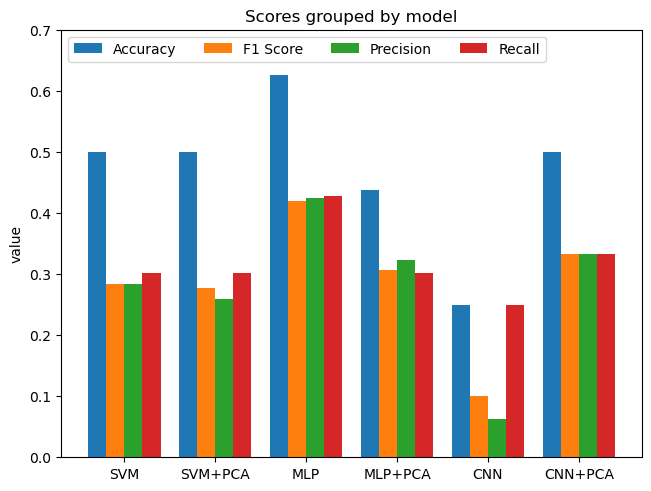

In [107]:
import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
scores = {
    'Accuracy': eval_df.test_accuracy,
    'F1 Score': eval_df.test_f1_score,
    'Precision': eval_df.test_precision,
    'Recall': eval_df.test_recall,
}

models = eval_df.model

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in scores.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('value')
ax.set_title('Scores grouped by model')
ax.set_xticks(x + width + 0.1, models)
ax.legend(loc='upper left', ncols=6)
ax.set_ylim(0, 0.7)

plt.show()

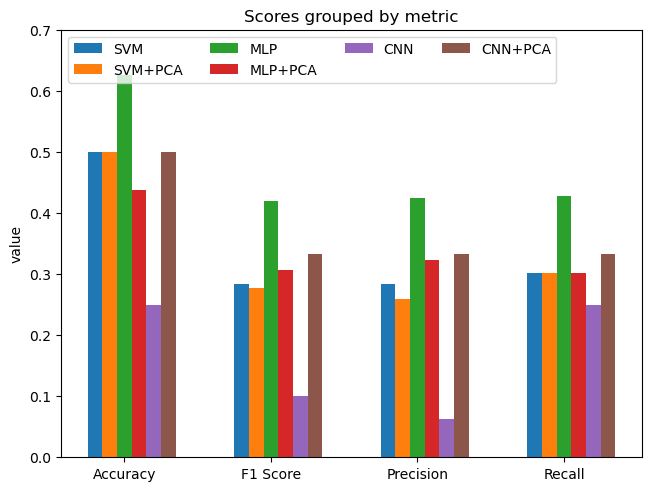

In [108]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ("Accuracy", "F1 Score", "Precision", "Recall")
scores = {
    eval_df.loc[0].to_numpy()[0]: list(eval_df.loc[0].to_numpy()[5:]),
    eval_df.loc[1].to_numpy()[0]: list(eval_df.loc[1].to_numpy()[5:]),
    eval_df.loc[2].to_numpy()[0]: list(eval_df.loc[2].to_numpy()[5:]),
    eval_df.loc[3].to_numpy()[0]: list(eval_df.loc[3].to_numpy()[5:]),
    eval_df.loc[4].to_numpy()[0]: list(eval_df.loc[4].to_numpy()[5:]),
    eval_df.loc[5].to_numpy()[0]: list(eval_df.loc[5].to_numpy()[5:]),
}

models = eval_df.model

x = np.arange(len(metrics))  # the label locations
width = 0.1  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in scores.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('value')
ax.set_title('Scores grouped by metric')
ax.set_xticks(x + 0.1 + width, metrics)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 0.7)

plt.show()